## **灌漑可能面積 vs 集水域ポリゴン**

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [87]:
prefix = r"C:\Users\HONGO-23\Desktop\data\08_Irrigation"

In [88]:
a = "area_2023"
b = "Shape_Area"

### *UP STREAM*

In [89]:
file_u = prefix + r"\集水域分類shp\final\up_final.csv" 
df_u = pd.read_csv(file_u)
df_u.head()

,OBJECTID,Shape_Leng,Shape_Area,name
0,107480,55.773413,172.079311,BCBK1Ka
1,107482,22.311344,22.737468,BCBK1Ka
2,107483,67.532020,264.913156,BCBK1Ka
3,107484,79.607432,380.279300,BCBK1Ka
4,107485,72.855538,307.459421,BCBK1Ka


In [90]:
df_sum = df_u.groupby('name').sum(numeric_only=True)
df_sum = df_sum.reset_index()
df_sum.columns = ['name', 'OBJECTID', 'Shape_Leng', 'Shape_Area']
df_sum["Shape_Area"] = df_sum["Shape_Area"]/10000
df_sum = df_sum[["name"] + ["Shape_Area"]]
df_sum

,name,Shape_Area
0,BCBK1Ka,16.074190
1,BCBK2Ka,39.200382
2,BCBK2Ki,38.093057
3,BCBK3Ka,43.960810
4,BCBK3Ki,22.389505
5,BCBK4Ka,12.211983
6,BCBK4Ki,37.972645
7,BCBK5Ka,32.844110
8,BCBK6Ka,54.790093
9,BCBK6Ki,13.986699


In [91]:
file_u_name = prefix + r"\集水域分類shp\final\up_name.csv" 
df_u_name = pd.read_csv(file_u_name)
df_u_name

,name,area_2023
0,BCSK6Tg,64.70
1,BCSK6Ki,24.70
2,BCSK6Ka,14.70
3,BCSK7Ki,15.30
4,BCSK9Ki,116.15
5,BCSK10Ki,30.20
6,BCSK10Ka,17.80
7,BCSK10Tg,67.78
8,BCSK11Ki,31.50
9,BCSK11Ka,10.50


In [97]:
#combined_df = pd.concat([df_sum, df_u_name], axis=1)
#combined_df
df_u = pd.merge(df_u_name, df_sum, on='name', how='outer')
df_u['diff'] = df_u['area_2023'] - df_u['Shape_Area']
pd.set_option('display.max_rows', None)
df_u

,name,area_2023,Shape_Area,diff
0,BCSK6Tg,64.70,76.614115,-11.914115
1,BCSK6Ki,24.70,30.146121,-5.446121
2,BCSK6Ka,14.70,13.632522,1.067478
3,BCSK7Ki,15.30,12.620043,2.679957
4,BCSK9Ki,116.15,98.588437,17.561563
5,BCSK10Ki,30.20,31.609553,-1.409553
6,BCSK10Ka,17.80,22.556159,-4.756159
7,BCSK10Tg,67.78,43.730935,24.049065
8,BCSK11Ki,31.50,26.207509,5.292491
9,BCSK11Ka,10.50,8.751557,1.748443


In [113]:
diff_sum = df_u['diff'].sum()
print("列'diff'の合計:", diff_sum)

列'diff'の合計: 134.7825022946171


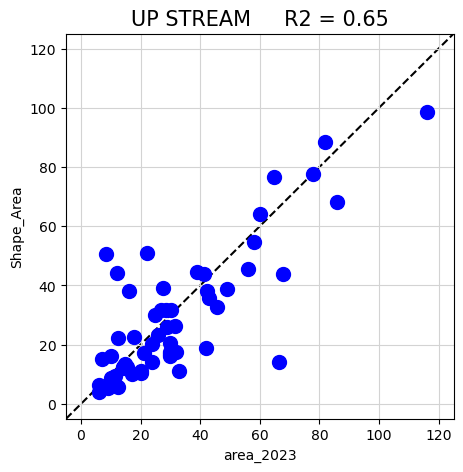

In [99]:
# 散布図を描画
plt.figure(figsize=(5, 5))  # figsizeを設定
plt.scatter(df_u[a], df_u[b], zorder=2, s = 100, c="blue", alpha=1)
plt.xlabel(a)
plt.ylabel(b)
plt.xlim(-5,125)
plt.ylim(-5,125)

# LinearRegressionモデルを作成し、R^2を計算
model = LinearRegression()
model.fit(df_u[[a]], df_u[b])
r_squared = model.score(df_u[[a]], df_u[b])

# R^2を表示
plt.title('UP STREAM     R2 = {:.2f}'.format(r_squared), fontsize = 15)

# 斜めの線を追加
plt.axline((0, 0), (100, 100), color='black', zorder=1, linestyle="dashed")

# 図の背景を白くする
plt.gca().set_facecolor('white')

# 色を設定するリストを作成
#colors = ['red' if row[a] > row[b] else 'blue' for _, row in df_u.iterrows()]
#colors = ['red' if diff < 0 else 'blue' for diff in df_u['diff']]

# 枠を黒くする
plt.gca().spines['top'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.grid(color='lightgray')
#plt.savefig(r"C:\Users\HONGO-23\Desktop\data\Irrigation\analysis\01_UP\up_1.jpeg",dpi=300)
plt.show()

### *MIDDLE STREAM*

In [105]:
file_m = prefix + r"\集水域分類shp\merge\mid\mid_merge.csv" 
df_m = pd.read_csv(file_m)
df_m.head()

,OBJECTID,Shape_Leng,Shape_Area,name
0,113241,58.728312,206.545529,BCPTB1
1,113242,124.404258,669.829324,BCPTB1
2,113243,115.170767,513.785971,BCPTB1
3,113244,105.338163,393.107393,BCPTB1
4,113245,100.319371,352.604040,BCPTB1


In [109]:
df_sum = df_m.groupby('name').sum(numeric_only=True)
df_sum = df_sum.reset_index()
df_sum.columns = ['name', 'OBJECTID', 'Shape_Leng', 'Shape_Area']
df_sum["Shape_Area"] = df_sum["Shape_Area"]/10000
df_sum = df_sum[["name"] + ["Shape_Area"]]
df_sum.head()

,name,Shape_Area
0,BCPTB1,62.130088
1,BCPTB2,35.957789
2,BCPTB3,123.496078
3,BCPTB4,17.367591
4,BCPTB5Ka,122.321821


In [117]:
file_m_name = prefix + r"\集水域分類shp\final\mid_name.csv" 
df_m_name = pd.read_csv(file_m_name)
df_m_name.head()

,name,area_2023
0,BCSK18,6.0
1,BCSK19,7.0
2,BCSK20,49.0
3,BCSK21,48.0
4,BCSK22,11.0


In [118]:
df_m = pd.merge(df_m_name, df_sum, on='name', how='outer')
df_m['diff'] = df_m['area_2023'] - df_m['Shape_Area']
pd.set_option('display.max_rows', None)
df_m

,name,area_2023,Shape_Area,diff
0,BCSK18,6.00,3.125582,2.874418
1,BCSK19,7.00,6.984570,0.015430
2,BCSK20,49.00,43.006266,5.993734
3,BCSK21,48.00,40.375013,7.624987
4,BCSK22,11.00,4.407079,6.592921
5,BCSK23,111.00,93.171373,17.828627
6,BCSK24,32.00,31.906882,0.093118
7,BCSK25,7.00,9.936836,-2.936836
8,BCSK26,113.00,117.164681,-4.164681
9,BCSK27,116.00,80.494543,35.505457


In [119]:
diff_sum = df_m['diff'].sum()
print("列'diff'の合計:", diff_sum)

列'diff'の合計: 183.7127344026369


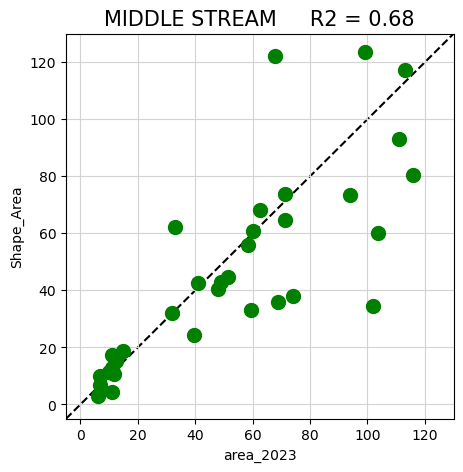

In [122]:
# 散布図を描画
plt.figure(figsize=(5, 5))  # figsizeを設定
plt.scatter(df_m[a], df_m[b], zorder=2, s = 100, c="g", alpha=1)
plt.xlabel(a)
plt.ylabel(b)
plt.xlim(-5,130)
plt.ylim(-5,130)

# LinearRegressionモデルを作成し、R^2を計算
model = LinearRegression()
model.fit(df_m[[a]], df_m[b])
r_squared = model.score(df_m[[a]], df_m[b])

# R^2を表示
plt.title('MIDDLE STREAM     R2 = {:.2f}'.format(r_squared), fontsize = 15)

# 斜めの線を追加
plt.axline((0, 0), (100, 100), color='black', zorder=1, linestyle="dashed")

# 図の背景を白くする
plt.gca().set_facecolor('white')

# 色を設定するリストを作成
#colors = ['red' if row[a] > row[b] else 'blue' for _, row in df_u.iterrows()]
#colors = ['red' if diff < 0 else 'blue' for diff in df_u['diff']]

# 枠を黒くする
plt.gca().spines['top'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.grid(color='lightgray')
#plt.savefig(r"C:\Users\HONGO-23\Desktop\data\Irrigation\analysis\01_UP\up_1.jpeg",dpi=300)
plt.show()

### *DOWN STREAM*

In [146]:
file_d = prefix + r"\集水域分類shp\merge\down\down_merge.csv" 
df_d = pd.read_csv(file_d)
df_d.head()

,OBJECTID,Shape_Leng,Shape_Area,name
0,37440,98.641853,408.660250,BCBT1
1,37441,158.058711,804.835326,BCBT1
2,37442,107.508716,362.767122,BCBT1
3,37443,84.885305,287.292221,BCBT1
4,37444,55.936078,178.676467,BCBT1


In [147]:
df_sum = df_d.groupby('name').sum(numeric_only=True)
df_sum = df_sum.reset_index()
df_sum.columns = ['name', 'OBJECTID', 'Shape_Leng', 'Shape_Area']
df_sum["Shape_Area"] = df_sum["Shape_Area"]/10000
df_sum = df_sum[["name"] + ["Shape_Area"]]
df_sum

,name,Shape_Area
0,BCBT1,48.060345
1,BCBT2,21.248932
2,BCBT3,10.310463
3,BCBT4,56.441345
4,BCKR1,7.536269
5,BCKR2,1.656428
6,BCKR3Ka,69.348351
7,BCKR3Ki,48.180625
8,BCKR4,8.871735
9,BCKR5Ka,37.829592


In [148]:
file_d_name = prefix + r"\集水域分類shp\final\down_name.csv" 
df_d_name = pd.read_csv(file_d_name)
df_d_name

,name,area_2023
0,BCRJ1,7.50
1,BCRJ2,16.50
2,BCRJ3,22.75
3,BCRJ4,6.50
4,BCRJ5Ki,15.25
5,BCRJ5Ka,8.50
6,BCRJ6Ki,27.25
7,BCRJ6Ka,43.50
8,BCRJ7,42.50
9,BCRJ8,41.25


In [149]:
df_d = pd.merge(df_d_name, df_sum, on='name', how='outer')
df_d['diff'] = df_d['area_2023'] - df_d['Shape_Area']
pd.set_option('display.max_rows', None)
df_d

,name,area_2023,Shape_Area,diff
0,BCRJ1,7.50,5.081684,2.418316
1,BCRJ2,16.50,12.978152,3.521848
2,BCRJ3,22.75,28.326001,-5.576001
3,BCRJ4,6.50,6.794009,-0.294009
4,BCRJ5Ki,15.25,22.419618,-7.169618
5,BCRJ5Ka,8.50,5.115493,3.384507
6,BCRJ6Ki,27.25,49.635747,-22.385747
7,BCRJ6Ka,43.50,39.983713,3.516287
8,BCRJ7,42.50,61.269463,-18.769463
9,BCRJ8,41.25,29.732615,11.517385


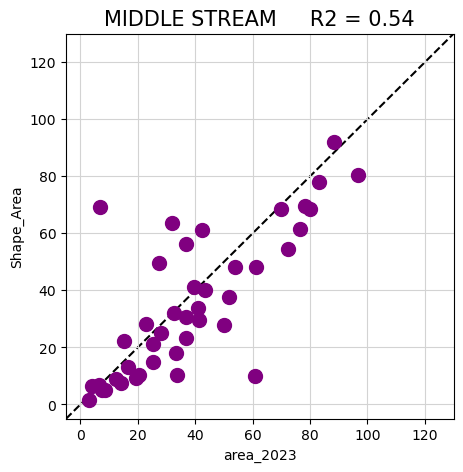

In [150]:
# 散布図を描画
plt.figure(figsize=(5, 5))  # figsizeを設定
plt.scatter(df_d[a], df_d[b], zorder=2, s = 100, c="purple", alpha=1)
plt.xlabel(a)
plt.ylabel(b)
plt.xlim(-5,130)
plt.ylim(-5,130)

# LinearRegressionモデルを作成し、R^2を計算
model = LinearRegression()
model.fit(df_d[[a]], df_d[b])
r_squared = model.score(df_d[[a]], df_d[b])

# R^2を表示
plt.title('MIDDLE STREAM     R2 = {:.2f}'.format(r_squared), fontsize = 15)

# 斜めの線を追加
plt.axline((0, 0), (100, 100), color='black', zorder=1, linestyle="dashed")

# 図の背景を白くする
plt.gca().set_facecolor('white')

# 色を設定するリストを作成
#colors = ['red' if row[a] > row[b] else 'blue' for _, row in df_u.iterrows()]
#colors = ['red' if diff < 0 else 'blue' for diff in df_u['diff']]

# 枠を黒くする
plt.gca().spines['top'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.grid(color='lightgray')
#plt.savefig(r"C:\Users\HONGO-23\Desktop\data\Irrigation\analysis\01_UP\up_1.jpeg",dpi=300)
plt.show()